In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import pandas as pd
import time
import sklearn.metrics
from sklearn.utils import shuffle
import seaborn as sns
%matplotlib inline

In [2]:
def  batch_gd_Adagrad(x_data, y_data, theta_0, theta_1, learning_rate,epsilon, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    hypothesis =[]
    
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                final_Optimum_values = theta_00[-1],theta_11[-1]
                return error, theta_00, theta_11, hypothesis, final_Optimum_values 
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        e = h-y_data #error
        
        j= 1/(2*m)*np.dot(e,e) #calculating the cost fuction 
        
        plt.figure(figsize=(12, 6), dpi=80)
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        
        plt.plot(x_data, h) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("theta_0= "+str(theta_0),"theta_1= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        theta_0_grad = (1/m)*np.sum(e)
        vt_theta_0 = vt_theta_0 + (theta_0_grad**2)
        
        theta_1_grad = (1/m)*np.dot(e, x_data)
        vt_theta_1 = vt_theta_1 + (theta_1_grad**2)
                                             
        theta_0 = theta_0 - (learning_rate*theta_0_grad/(np.sqrt(vt_theta_0) + epsilon))
        theta_1 = theta_1 - (learning_rate*theta_1_grad/(np.sqrt(vt_theta_1) + epsilon))
        
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        hypothesis.append(h)
                             
    final_Optimum_values = theta_00[-1],theta_11[-1]

    return error, theta_00, theta_11, hypothesis, final_Optimum_values 

theta_0= 1.592434438553896
theta_1= -0.9690158197998231
cost function= 0.021428364728446257
r2_score= 0.9987647177980072
iter no.= 67


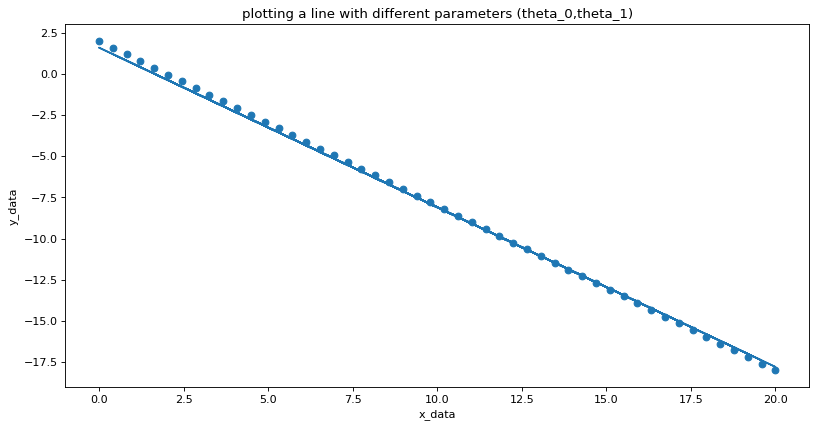

In [4]:
a = -1
b = 2

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)


theta_0=0
theta_1=0
learning_rate = 1000000000
epoch = 100
epsilon = 0.00000001

error, theta_00, theta_11, hypothesis, final_Optimum_values=batch_gd_Adagrad(x, y, theta_0, theta_1, learning_rate,epsilon, epoch)

(Text(0, 0.5, 'cost_function(j)'),)

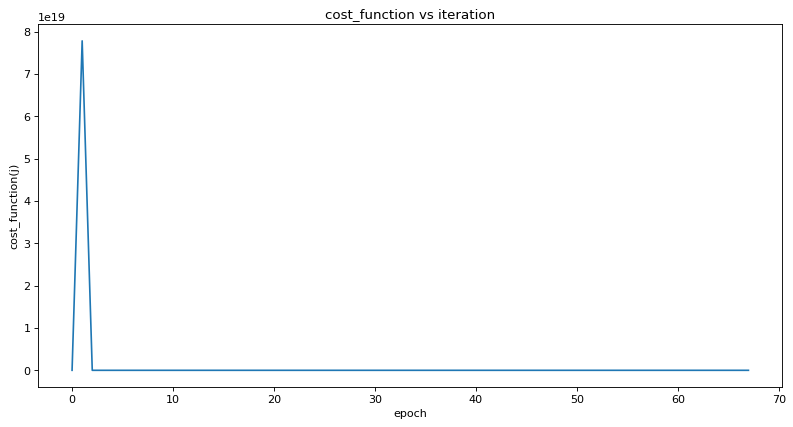

In [5]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

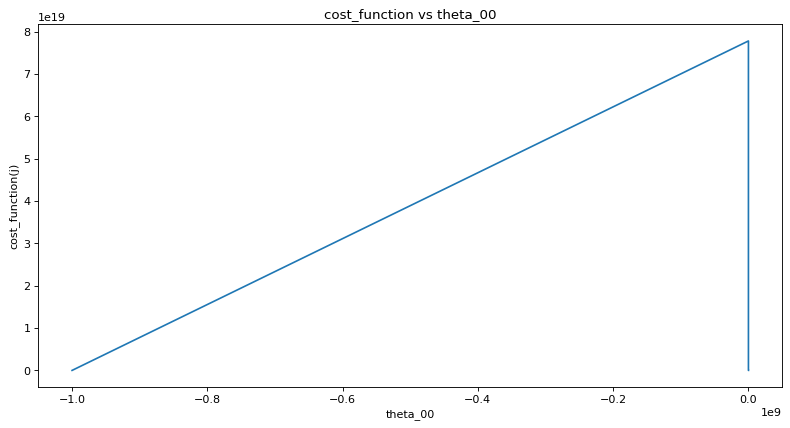

In [6]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_00, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

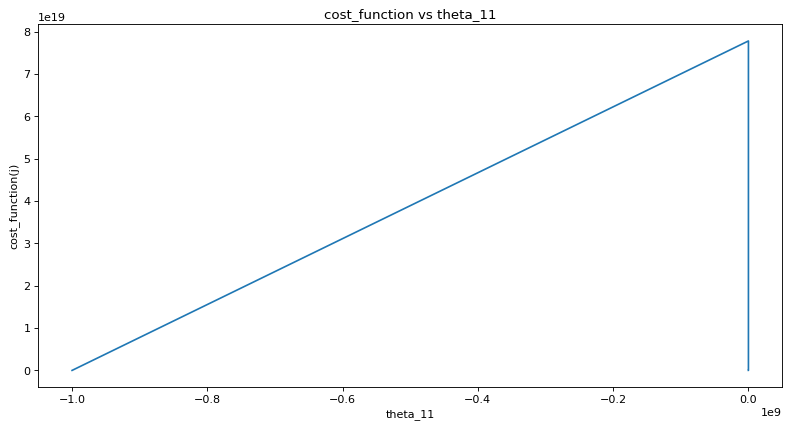

In [7]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_11, error)
plt.title("cost_function vs theta_11")
plt.xlabel("theta_11")
plt.ylabel("cost_function(j)"),

In [8]:
def  batch_gd_RMS(x_data, y_data, theta_0, theta_1, learning_rate,epsilon,beta, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    hypothesis =[]
    
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                final_Optimum_values = theta_00[-1],theta_11[-1]
                return error, theta_00, theta_11, hypothesis, final_Optimum_values 
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        e = h-y_data #error
        
        j= np.dot(e,e)/(2*m) #calculating the cost fuction 
        
        plt.figure(figsize=(12, 6), dpi=80)
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        
        plt.plot(x_data, h) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("theta_0= "+str(theta_0),"theta_1= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        theta_0_grad = (1/m)*np.sum(e)
        vt_theta_0 = (beta*vt_theta_0) +((1-beta)*(theta_0_grad**2))
        
        theta_1_grad = (1/m)*np.dot(e, x_data)
        vt_theta_1 = (beta*vt_theta_1) + ((1-beta)*(theta_1_grad**2))
                                             
        theta_0 = theta_0 - (learning_rate*theta_0_grad/(np.sqrt(vt_theta_0) + epsilon))
        theta_1 = theta_1 - (learning_rate*theta_1_grad/(np.sqrt(vt_theta_1) + epsilon))
        
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        hypothesis.append(h)
                             
    final_Optimum_values = theta_00[-1],theta_11[-1]

    return error, theta_00, theta_11, hypothesis, final_Optimum_values 

theta_0= 0.48717719509318974
theta_1= -0.8822570799152399
cost function= 0.2967319030989183
r2_score= 0.9828942785272389
iter no.= 199


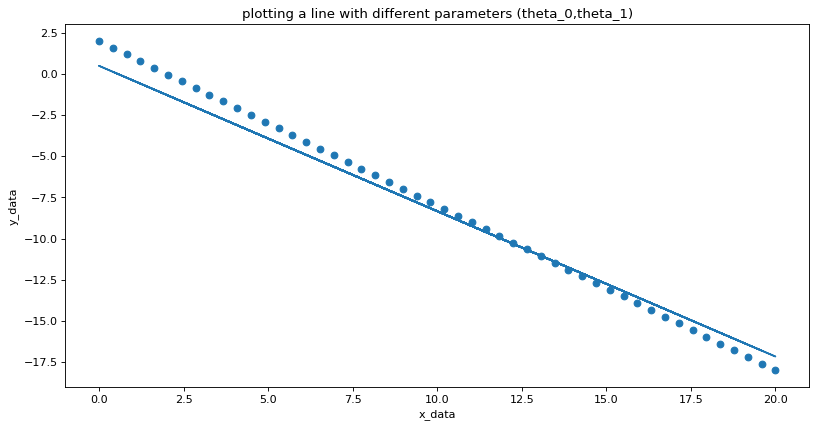

In [9]:
a = -1
b = 2

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)


theta_0=0
theta_1=0
learning_rate = 0.01
epoch = 200
epsilon = 0.00000001
beta= 0.8
error, theta_00, theta_11, hypothesis, final_Optimum_values=batch_gd_RMS(x, y, theta_0, theta_1, learning_rate,epsilon, beta, epoch)

(Text(0, 0.5, 'cost_function(j)'),)

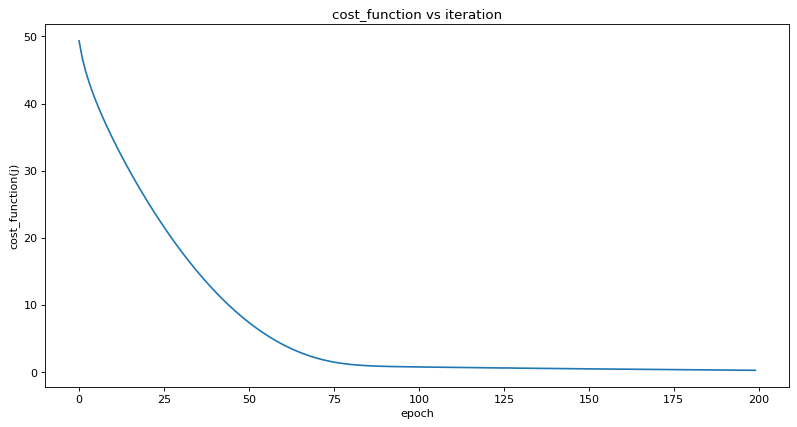

In [10]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

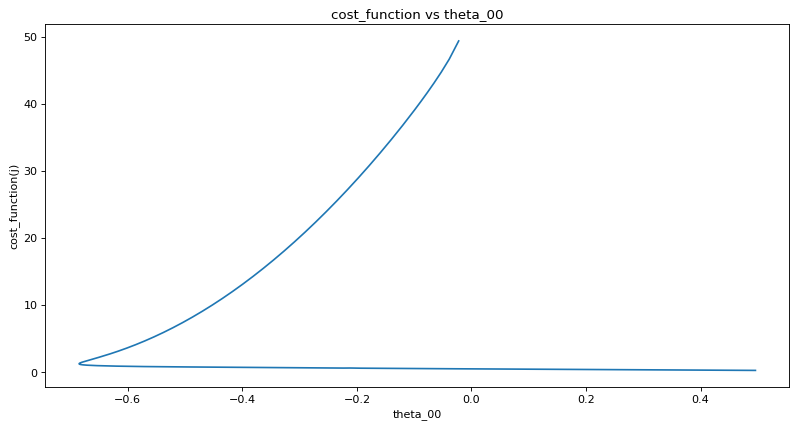

In [11]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_00, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

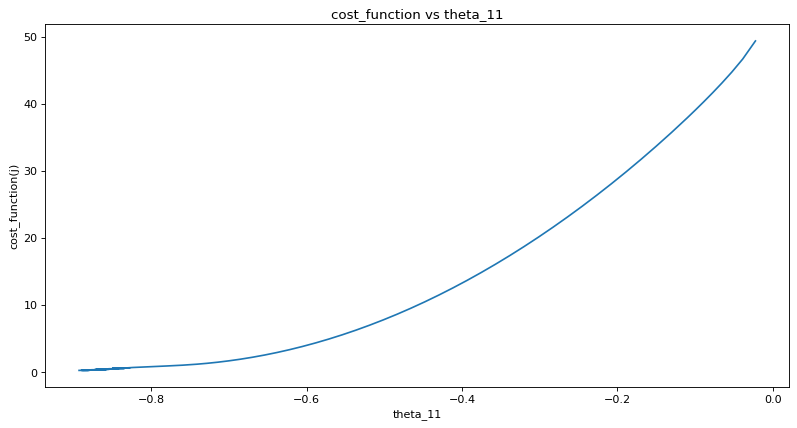

In [12]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_11, error)
plt.title("cost_function vs theta_11")
plt.xlabel("theta_11")
plt.ylabel("cost_function(j)"),

In [2]:
def  batch_gd_Adam(x_data, y_data, theta_0, theta_1, learning_rate, epsilon, beta_1, beta_2, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    hypothesis =[]
    
    mt_0 = 0
    mt_1 = 0
    
    vt_0 = 0
    vt_1 = 0
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                final_Optimum_values = theta_00[-1],theta_11[-1]
                return error, theta_00, theta_11, hypothesis, final_Optimum_values 
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        e = h-y_data #error
        
        j= np.dot(e,e)/(2*m) #calculating the cost fuction 
        
        
        plt.figure(figsize=(12, 6), dpi=80)
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        plt.plot(x_data, h) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("theta_0= "+str(theta_0),"theta_1= "+str(theta_1),"cost function= "+str(j),sep="\n")
        print("r2_score = "+ str(r2_score))
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.25)
        
        #Update the parameters (simultaneously)         
        
        # theta 0
        theta_0_grad = (1/m)*np.sum(e)
        
        mt_0 = (beta_1*mt_0) + ((1-beta_1)*theta_0_grad)
        mt_hat_0 = mt_0/(1-(beta_1**(i+1)))
        
        vt_0 = (beta_2*vt_0) +((1-beta_2)*(theta_0_grad**2))
        vt_hat_0 = vt_0/(1-(beta_2**(i+1)))
                                             
        # theta 1                         
        theta_1_grad = (1/m)*np.dot(e, x_data)
                                             
        mt_1 = (beta_1*mt_1) + ((1-beta_1)*theta_1_grad)
        mt_hat_1 = mt_1/(1-(beta_1**(i+1)))
                                             
        vt_1 = (beta_2*vt_1) + ((1-beta_2)*(theta_1_grad**2))
        vt_hat_1 = vt_1/(1-(beta_2**(i+1)))
                                             
                                  
        theta_0 = theta_0 - (learning_rate*mt_hat_0/(np.sqrt(vt_hat_0) + epsilon))
        theta_1 = theta_1 - (learning_rate*mt_hat_1/(np.sqrt(vt_hat_1) + epsilon))
        
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        hypothesis.append(h)
                             
    final_Optimum_values = theta_00[-1],theta_11[-1]

    return error, theta_00, theta_11, hypothesis, final_Optimum_values 

theta_0= 1.8669865681347866
theta_1= -1.1330130048133478
cost function= 1.377304432389591
r2_score = 0.9206024503681295
iter no.= 99


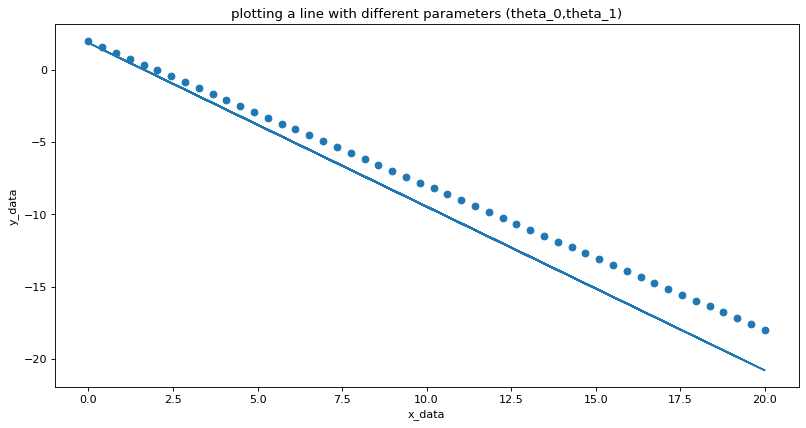

In [4]:
a = -1
b = 2

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)


theta_0=0
theta_1=0
learning_rate = 1
epoch = 100
epsilon = 1e-8
beta_2= 0.7
beta_1= 0.7
error, theta_00, theta_11, hypothesis, final_Optimum_values=batch_gd_Adam(x, y, theta_0, theta_1, learning_rate,
                                                                          epsilon, beta_1, beta_2, epoch)

(Text(0, 0.5, 'cost_function(j)'),)

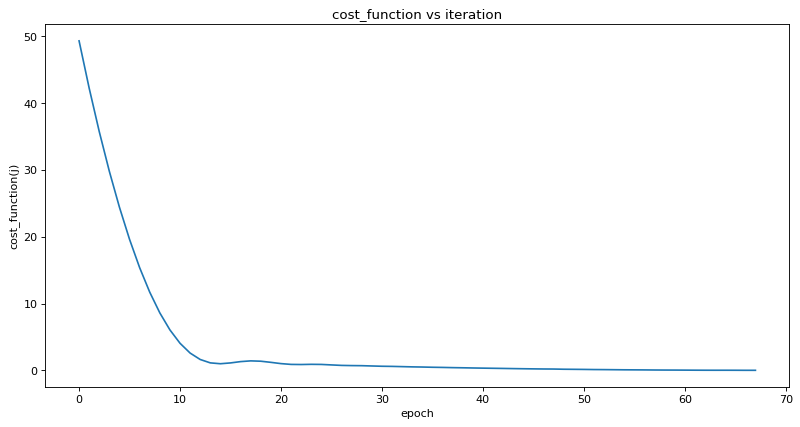

In [15]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

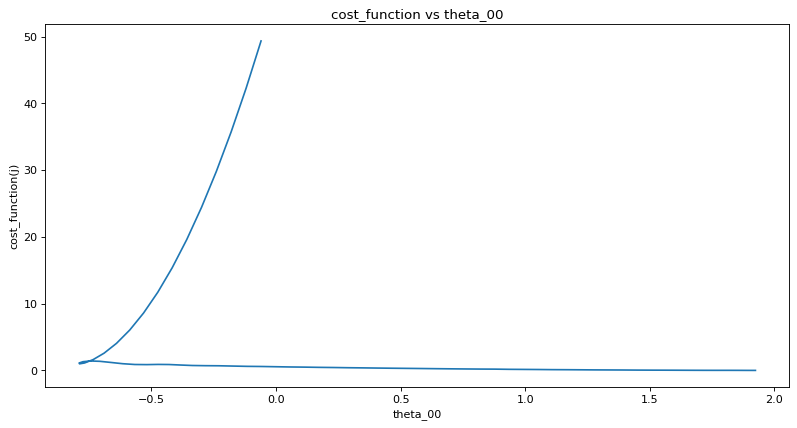

In [16]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_00, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

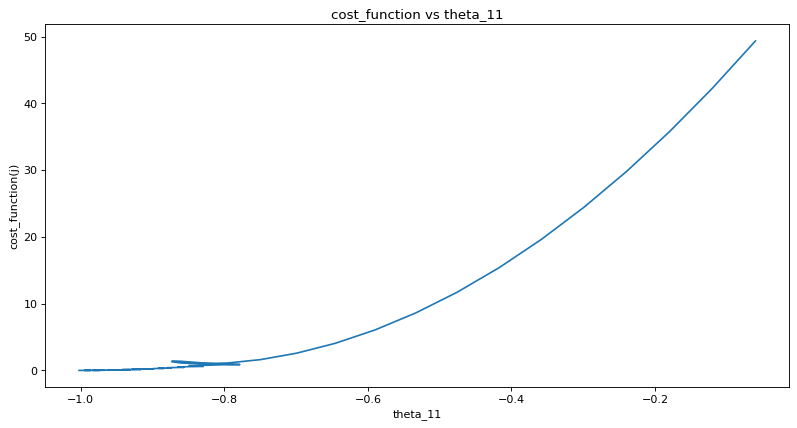

In [17]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_11, error)
plt.title("cost_function vs theta_11")
plt.xlabel("theta_11")
plt.ylabel("cost_function(j)"),